#Archisha Sinha

##Domain: Computer Vision
##Topic: Histogram of Oriented Gradients (HOG)

## Experiment 3: Determine HOG of the given Image and use it to detect Objects in that Image

Task 1: Determine HoG of the given image.

Task 2: Change brightness and repeat task 1. Observe the effect on HoG due to change in brightness

Task 3: Use SVM detector to detect people

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.feature import hog
from skimage.transform import resize # We resize the original image so that the image is multiple of 8 bec we divide our image in the patches of 8x8
from skimage import exposure as exp #To rescale the image so that the image is clear, actual hog remains same

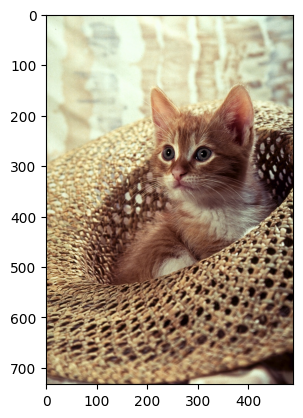

In [ ]:
image = imread('/content/cat.png')
plt.imshow(image)


In [ ]:
image.shape

(733, 490, 3)

if brightness of the image is inc or dec then the hog of image is not affected and the object detdction is still possible

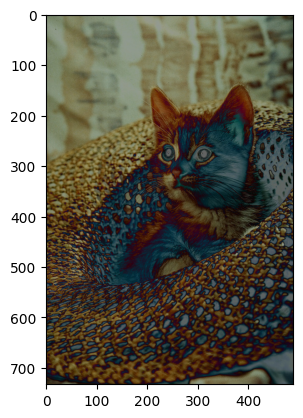

In [ ]:
#Reducing the brightness
image1= image
image2= cv2.convertScaleAbs(image, beta=-100)
plt.imshow(image2)

In [ ]:
# Resizing the image1
image1_rs = resize(image1, (128*5, 64*7))
## Integer multiples pf 128 and 64 is done (5 and 7 are random integers) such that the shape of original image is not disturbed (aprox) but multiples of 8

In [ ]:
image1_rs.shape

(640, 448, 3)

In [ ]:
# Since we are not getting a perfect size image thus we change the random integer
# Resizing the image1 again
image1_rs = resize(image1, (128*6, 64*8))
image1_rs.shape

(768, 512, 3)

Now we have sizes approximate to the original image

In [ ]:
# Resizing the image2
image2_rs = resize(image2, (128*6, 64*8))
image2_rs.shape

(768, 512, 3)

In [ ]:
# Visualizing HOG of image 1

f_image1, hog_image1 = hog(image1_rs, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image1.shape)
print(hog_image1.shape)

(215460,)
(768, 512)


We have generated hog of image 1

In [ ]:
# Visualizing HOG of image 2

f_image2, hog_image2 = hog(image2_rs, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image2.shape)
print(hog_image2.shape)

(215460,)
(768, 512)


We have generated hog of image2

In [ ]:
# Now we are rescaling after taking hog,
#the values above 90 will be clipped to 255 and less than 2 will be clipped to 0

p2_1, p90_1 = np.percentile(hog_image1, (2, 90))
hog_image1_rescale = exp.rescale_intensity(hog_image1, in_range=(p2_1, p90_1))

p2_2, p90_2 = np.percentile(hog_image2, (2, 90))
hog_image2_rescale = exp.rescale_intensity(hog_image2, in_range=(p2_2, p90_2))

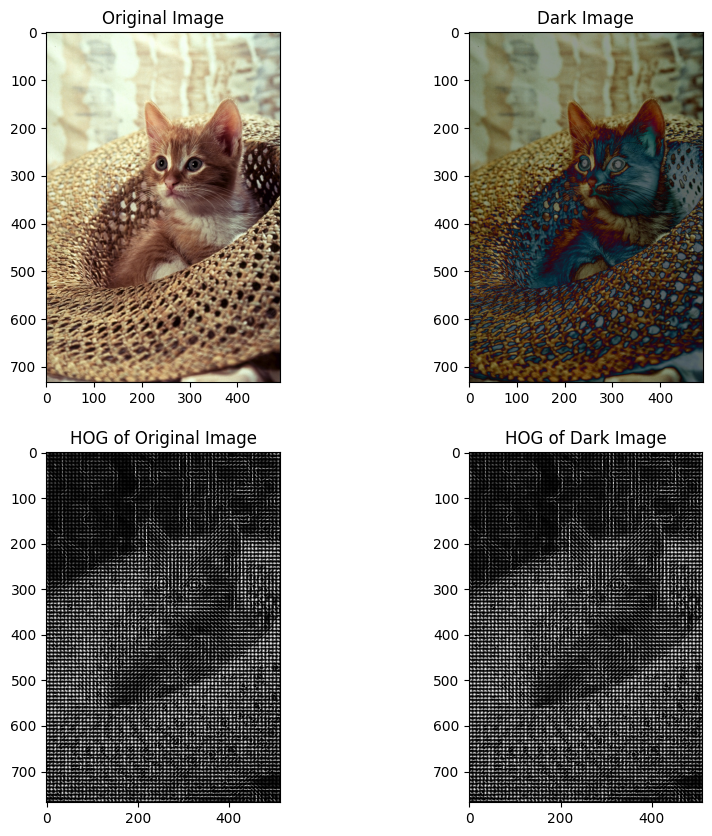

In [ ]:
# Plotting original, dark image, hog of original image, hog of dark image

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Dark Image')

plt.subplot(2, 2, 3)
plt.imshow(hog_image1_rescale, cmap='gray')
plt.title('HOG of Original Image')

plt.subplot(2, 2, 4)
plt.imshow(hog_image2_rescale, cmap='gray')
plt.title('HOG of Dark Image')

plt.show()

###in cat image there is very fine details thus 8x8 pixel in 1 cell is not giving fine details, thus now we make it 16x16 pixels per cell

In [ ]:
# Visualizing HOG of image 1

f_image1, hog_image1 = hog(image1_rs, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image1.shape)
print(hog_image1.shape)

(52452,)
(768, 512)


We have generated hog of image 1

In [ ]:
# Visualizing HOG of image 2

f_image2, hog_image2 = hog(image2_rs, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image2.shape)
print(hog_image2.shape)

(52452,)
(768, 512)


We have generated hog of image2

In [ ]:
# Now we are rescaling after taking hog,
#the values above 90 will be clipped to 255 and less than 2 will be clipped to 0

p2_1, p90_1 = np.percentile(hog_image1, (2, 90))
hog_image1_rescale = exp.rescale_intensity(hog_image1, in_range=(p2_1, p90_1))

p2_2, p90_2 = np.percentile(hog_image2, (2, 90))
hog_image2_rescale = exp.rescale_intensity(hog_image2, in_range=(p2_2, p90_2))

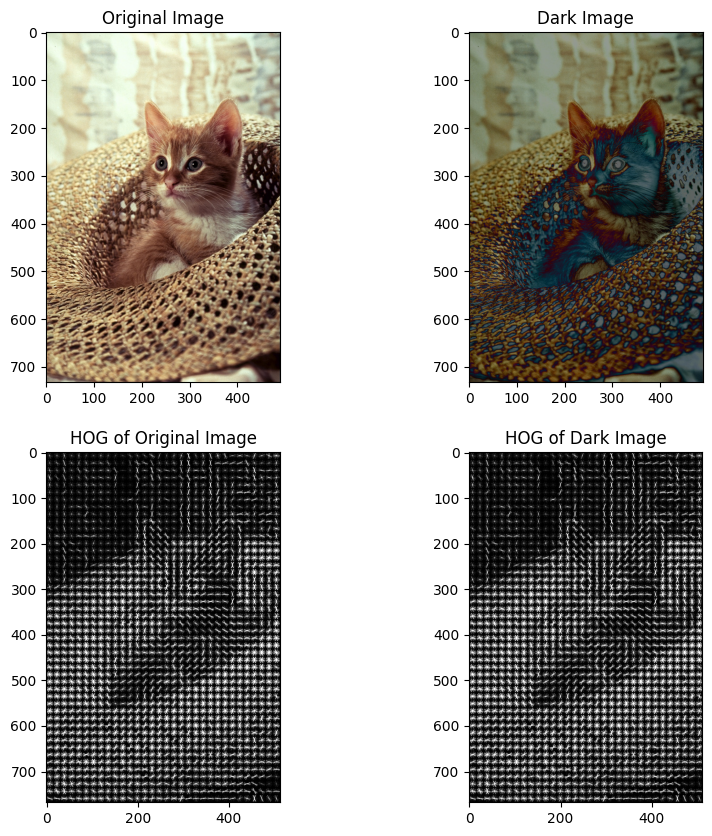

In [ ]:
# Plotting original, dark image, hog of original image, hog of dark image

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Dark Image')

plt.subplot(2, 2, 3)
plt.imshow(hog_image1_rescale, cmap='gray')
plt.title('HOG of Original Image')

plt.subplot(2, 2, 4)
plt.imshow(hog_image2_rescale, cmap='gray')
plt.title('HOG of Dark Image')

plt.show()

HOG is not for edge enhancement

###Now, we are making 64x64 pixels per cell

In [ ]:
# Visualizing HOG of image 1

f_image1, hog_image1 = hog(image1_rs, orientations=9, pixels_per_cell=(64, 64),       #hereeee
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image1.shape)
print(hog_image1.shape)

(2772,)
(768, 512)


We have generated hog of image 1

In [ ]:
# Visualizing HOG of image 2

f_image2, hog_image2 = hog(image2_rs, orientations=9, pixels_per_cell=(64, 64),         #hereeee
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image2.shape)
print(hog_image2.shape)

(2772,)
(768, 512)


We have generated hog of image2

In [ ]:
# Now we are rescaling after taking hog,
#the values above 90 will be clipped to 255 and less than 2 will be clipped to 0

p2_1, p90_1 = np.percentile(hog_image1, (2, 90))
hog_image1_rescale = exp.rescale_intensity(hog_image1, in_range=(p2_1, p90_1))

p2_2, p90_2 = np.percentile(hog_image2, (2, 90))
hog_image2_rescale = exp.rescale_intensity(hog_image2, in_range=(p2_2, p90_2))

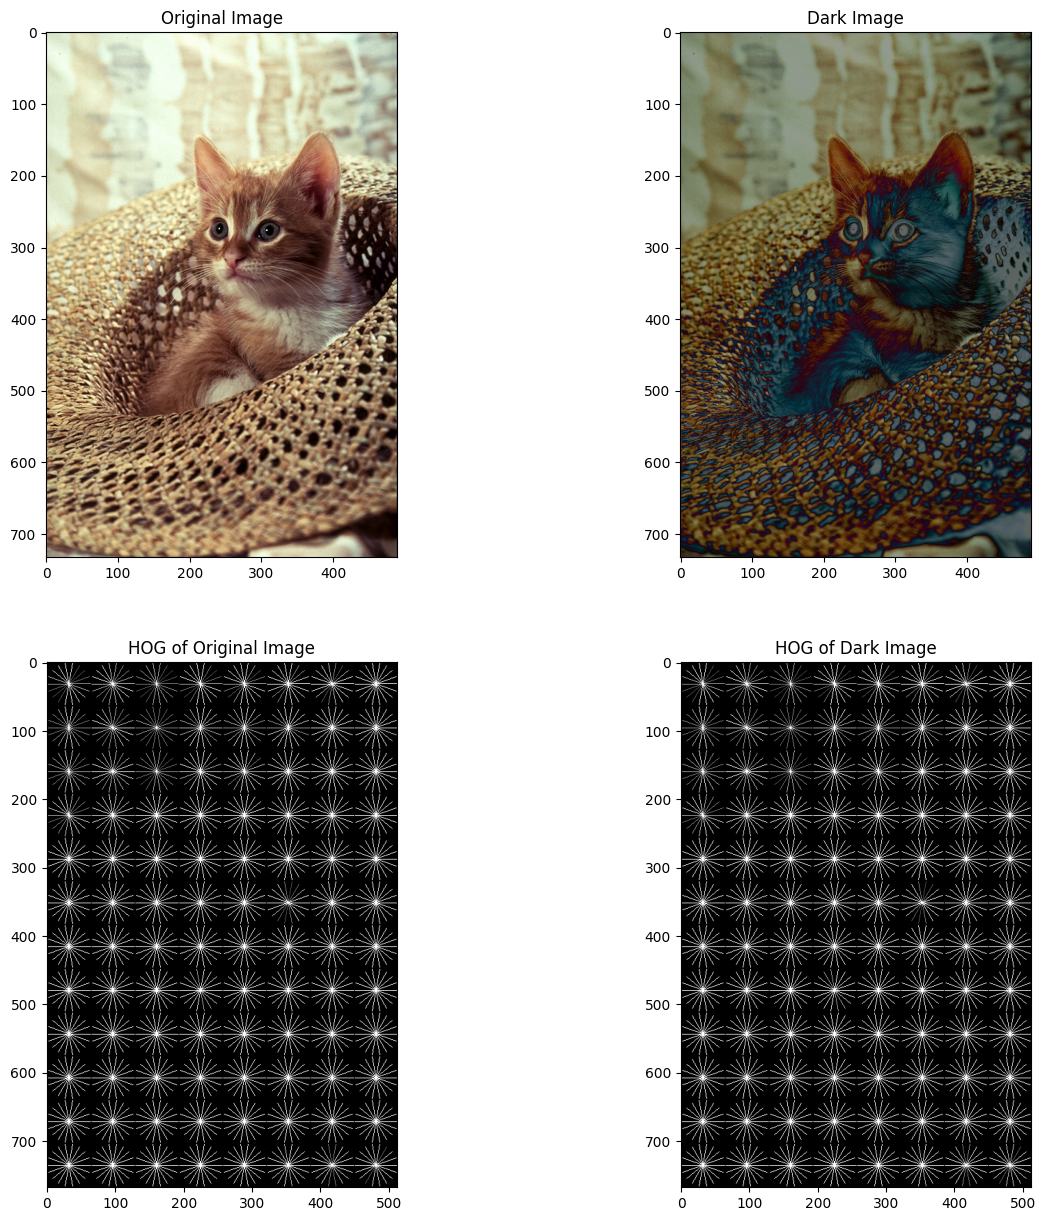

In [ ]:
# Plotting original, dark image, hog of original image, hog of dark image

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Dark Image')

plt.subplot(2, 2, 3)
plt.imshow(hog_image1_rescale, cmap='gray')
plt.title('HOG of Original Image')

plt.subplot(2, 2, 4)
plt.imshow(hog_image2_rescale, cmap='gray')
plt.title('HOG of Dark Image')

plt.show()

- Each cell is larger and we can see the each large cell
- there are 8 lines, which coresponds to angles (bins) in all direction
- if any angle is light then the there are very less magnitude chnage in those pixels
- thus this give a better clarity
- line give the magnitude and its angle gives it intensity

### Now making Orientation = 4 but original HOG uses orientation = 9

In [ ]:
# Visualizing HOG of image 1

f_image1, hog_image1 = hog(image1_rs, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image1.shape)
print(hog_image1.shape)

(95760,)
(768, 512)


We have generated hog of image 1

In [ ]:
# Visualizing HOG of image 2

f_image2, hog_image2 = hog(image2_rs, orientations=4, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis= -1)

In [ ]:
print(f_image2.shape)
print(hog_image2.shape)

(95760,)
(768, 512)


We have generated hog of image2

In [ ]:
# Now we are rescaling after taking hog,
#the values above 90 will be clipped to 255 and less than 2 will be clipped to 0

p2_1, p90_1 = np.percentile(hog_image1, (2, 90))
hog_image1_rescale = exp.rescale_intensity(hog_image1, in_range=(p2_1, p90_1))

p2_2, p90_2 = np.percentile(hog_image2, (2, 90))
hog_image2_rescale = exp.rescale_intensity(hog_image2, in_range=(p2_2, p90_2))

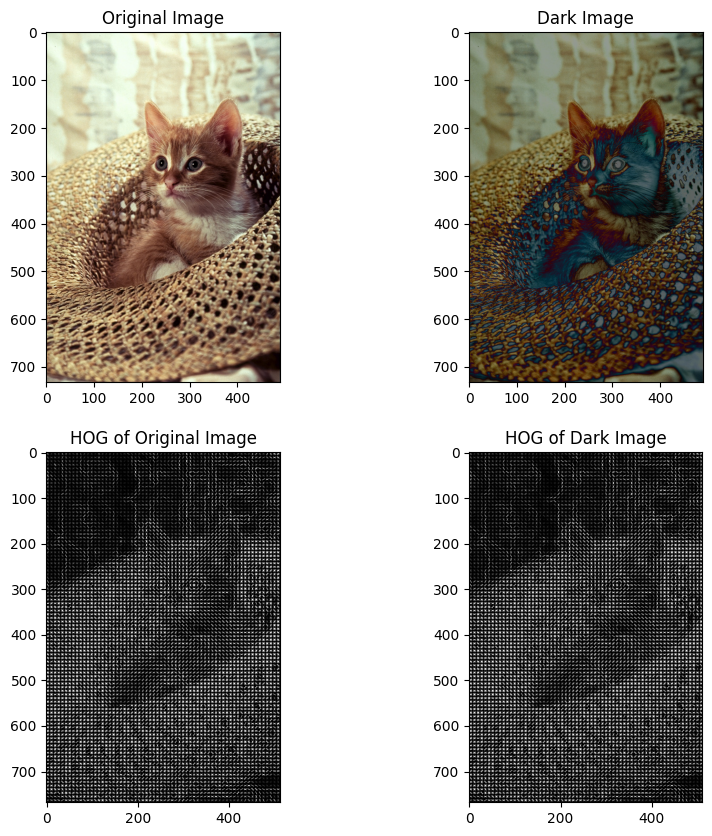

In [ ]:
# Plotting original, dark image, hog of original image, hog of dark image

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Dark Image')

plt.subplot(2, 2, 3)
plt.imshow(hog_image1_rescale, cmap='gray')
plt.title('HOG of Original Image')

plt.subplot(2, 2, 4)
plt.imshow(hog_image2_rescale, cmap='gray')
plt.title('HOG of Dark Image')

plt.show()

##CONCLUSION:
- HOG of original and Dark Image are computed and visualized.
- It is observed that HOG of both the images is similar.
- Even if we inc or dec the brightness it would be same
- this is bec the hog normalizes all the features.
- this is one of the advantages of hog, which shows that, HOG is invarient to change in brightness.
- No of pixels per cell = (8,8)
- Length of HOG discriptor is 215460
- If No of pixels per cell is increased from (16, 16), the Length of feature vector is decreased to 52452.
- Thus as the pixels per cell is increased then the Feature discriptor length reduces.



---



## To train model using HOG Features

In [ ]:
image = cv2.imread('/content/people9.jpg')

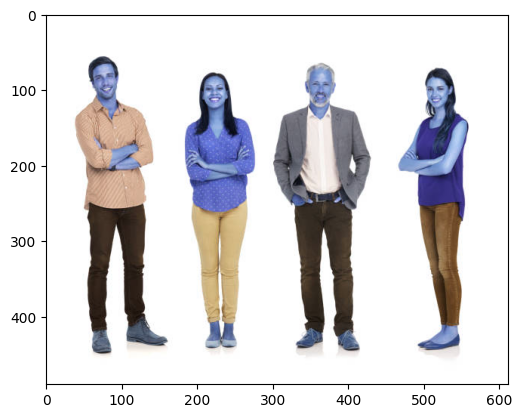

In [ ]:
plt.imshow(image, cmap='gray')

hog descriptor can be used to use svm detectore and it has several models to detect people which is already trained and we have invoked that

In [ ]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

if image.shape[1] < 400:
  (rows, cols) = image.shape[:2]
  ratio = cols/ float(rows)
  image = cv2.resize(image, (400, int(cols*ratio)))   # We ned to resize the image as svm people detector doesnot work on image larger or smaller than 400 size

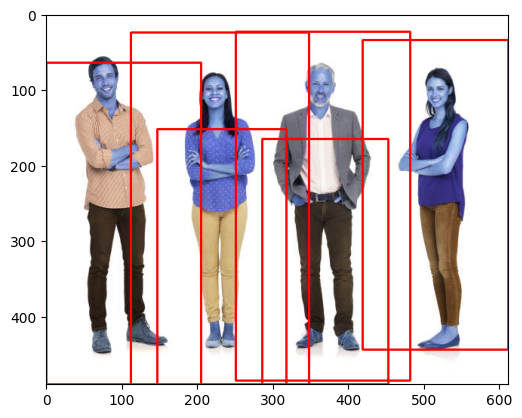

In [ ]:
#changing image to gray
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rectangles, weights = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.1)

for i,(x, y, w, h) in enumerate(rectangles):
  if weights[i] < 0.4:                              # If weights of image is less than 0.4 then nothig isdone, but if its more than 0.4 then people is being detected
    continue
  else:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255,0, 0), 2)

plt.imshow(image)

SVM generated 2 variable: rectangle and weights

In [ ]:
rectangles

array([[286, 165, 167, 325],
       [147, 152, 171, 338],
       [419,  34, 193, 410],
       [251,  23, 231, 462],
       [  0,  64, 205, 426],
       [112,  24, 236, 466]], dtype=int32)

In [ ]:
weights

array([1.12756456, 0.47704878, 0.9477754 , 2.31910604, 0.9738784 ,
       0.96620291])

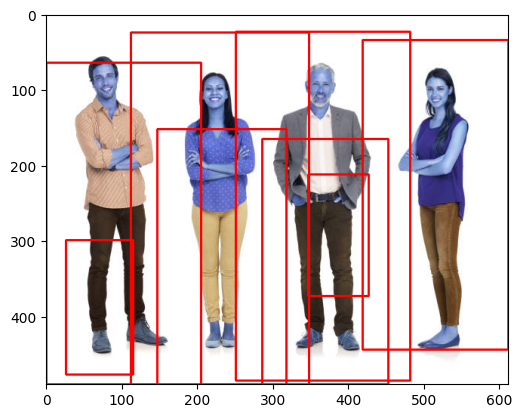

In [ ]:
# Changing scale to 1.01 and weight to 0.2
image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rectangles, weights = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.01)

for i,(x, y, w, h) in enumerate(rectangles):
  if weights[i] < 0.2:                              # If weights of image is less than 0.4 then nothig isdone, but if its more than 0.4 then people is being detected
    continue
  else:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255,0, 0), 2)

plt.imshow(image)

 ## CONCLUSION
 - For the given image, default SVM People Detector a pretrained model that is trained on HOG is used.
 - For winstride =(4,4) and scale = 1.1 : SVM detects people with weights of 1.09
 - If scale is reduced from 1.1 to 1.01, SVM detector uses more layers of image parameters to detect people which results in more no of rectangle around people
 - The no of rectangles can be reducing by increasing the threshold.